### CIFAR DATA
The problem of automatically identifying objects in photographs is difficult because of the near infinite number of permutations of objects, positions, lighting and so on. It’s a really hard problem. This is a well studied problem in computer vision and more recently an important demonstration of the capability of deep learning. A standard computer vision and deep learning dataset for this problem was developed by the Canadian Institute for Advanced Research
(CIFAR).
The CIFAR-10 dataset consists of 60,000 photos divided into 10 classes (hence the name
CIFAR-10). Classes include common objects such as airplanes, automobiles, birds, cats and so on. The dataset is split in a standard way, where 50,000 images are used for training a model and the remaining 10,000 for evaluating its performance. The photos are in color with red, green and blue channels, but are small measuring 32 × 32 pixel squares.

1. Load the  data set using `from keras.datasets import cifar10` and `(X_train, y_train), (X_test, y_test) = cifar10.load_data()`
2. Train and test a simple CNN Model for this dataset
  1. Convolutional input layer, 32 feature maps with a size of 3 × 3, a rectifier activation function and a weight constraint of max norm set to 3.
  2. Dropout set to 20%.
  3. Convolutional layer, 32 feature maps with a size of 3 × 3, a rectifier activation function and a weight constraint of max norm set to 3.
  4. Max Pool layer with the size 2 × 2.
  5. Flatten layer.
  6. Fully connected layer with 512 units and a rectifier activation function.
  7. Dropout set to 50%.
  8. Fully connected output layer with 10 units and a softmax activation function.
3. Train and test a larger CNN Model
  1. Convolutional input layer, 32 feature maps with a size of 3 × 3 and a rectifier activation function.
  2. Dropout layer at 20%.
  3. Convolutional layer, 32 feature maps with a size of 3 × 3 and a rectifier activation function.
  4. Max Pool layer with size 2 × 2.
  5. Convolutional layer, 64 feature maps with a size of 3 × 3 and a rectifier activation function.
  6. Dropout layer at 20%.
  7. Convolutional layer, 64 feature maps with a size of 3 × 3 and a rectifier activation function.
  8. Max Pool layer with size 2 × 2.
  9. Convolutional layer, 128 feature maps with a size of 3×3 and a rectifier activation function.
  10. Dropout layer at 20%.
  11. Convolutional layer, 128 feature maps with a size of 3×3 and a rectifier activation function.
  12. Max Pool layer with size 2 × 2.
  13. Flatten layer.
  14. Dropout layer at 20%.
  15. Fully connected layer with 1,024 units and a rectifier activation function.
  16. Dropout layer at 20%.
  17. Fully connected layer with 512 units and a rectifier activation function.
  18. Dropout layer at 20%.
  19. Fully connected output layer with 10 units and a softmax activation function.
  
4. Extensions to Improve Model Performance
  1. Train for More Epochs
  2. Image Data Augmentation
  3. Deeper Network Topology

In [0]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from keras.constraints import maxnorm
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D


Using TensorFlow backend.


In [0]:
# load (downloaded if needed) the cifar-10 dataset 
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [0]:
X_train.shape

(50000, 32, 32, 3)

In [0]:
y_train.shape

(50000, 1)

In [0]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

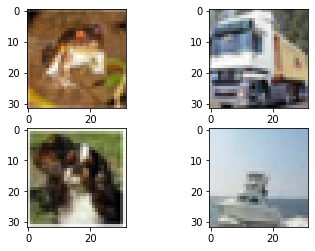

In [0]:
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0])
plt.subplot(222)
plt.imshow(X_train[1])
plt.subplot(223)
plt.imshow(X_train[500])
plt.subplot(224)
plt.imshow(X_train[100])
# show the plot
plt.show()

In [0]:
# reshape to be [samples][width][height][channels]
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
mean = np.mean(X_train)
stddev = np.std(X_train)
#scale
X_train = (X_train - mean) / stddev
X_test = (X_test - mean) / stddev
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [0]:
y_train.shape

(50000, 10)

In [0]:
def baseline_model():
      model = Sequential()
      model.add(Conv2D(32,(3,3), input_shape=(32,32,3), activation="relu" ,kernel_constraint=maxnorm(3)))
      model.add(Dropout(0.2))
      model.add(Conv2D(32,(3,3),  activation="relu",kernel_constraint=maxnorm(3)))
      model.add(MaxPooling2D(pool_size=(2,2)))
      model.add(Flatten())
      model.add(Dense(512, activation="relu"))
      model.add(Dropout(0.5))
      model.add(Dense(10,activation="softmax" ))
    
      # Compile model
      model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
      return model


In [0]:
#build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=25, batch_size=200,
    verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Simple CNN Baseline Error for CIFAR data: %.2f%%" % (100-scores[1]*100))

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
 - 136s - loss: 1.5893 - accuracy: 0.4319 - val_loss: 1.2211 - val_accuracy: 0.5724
Epoch 2/25
 - 140s - loss: 1.1859 - accuracy: 0.5796 - val_loss: 1.0443 - val_accuracy: 0.6390
Epoch 3/25
 - 135s - loss: 1.0188 - accuracy: 0.6453 - val_loss: 0.9634 - val_accuracy: 0.6655
Epoch 4/25
 - 135s - loss: 0.9008 - accuracy: 0.6857 - val_loss: 0.9174 - val_accuracy: 0.6781
Epoch 5/25
 - 135s - loss: 0.8084 - accuracy: 0.7149 - val_loss: 0.8743 - val_accuracy: 0.6950
Epoch 6/25
 - 140s - loss: 0.7335 - accuracy: 0.7402 - val_loss: 0.8782 - val_accuracy: 0.6968
Epoch 7/25
 - 135s - loss: 0.6710 - accuracy: 0.7644 - val_loss: 0.8591 - val_accuracy: 0.7043
Epoch 8/25
 - 135s - loss: 0.6033 - accuracy: 0.7859 - val_loss: 0.8808 - val_accuracy: 0.7058
Epoch 9/25
 - 135s - loss: 0.5547 - accuracy: 0.8023 - val_loss: 0.8794 - val_accuracy: 0.7158
Epoch 10/25
 - 135s - loss: 0.5076 - accuracy: 0.8193 - val_loss: 0.8882 - val_accuracy: 0.7108

In [0]:
#Train and test a larger CNN Model
def larger_model():
      model = Sequential()
      model.add(Conv2D(32,(3,3), input_shape=(32,32,3), activation="relu", padding='same'))
      model.add(Dropout(0.2))
      model.add(Conv2D(32,(3,3),  activation="relu", padding='same'))
      model.add(MaxPooling2D(pool_size=(2,2)))
      model.add(Conv2D(64,(3,3), activation="relu", padding='same'))
      model.add(Dropout(0.2))
      model.add(Conv2D(64,(3,3), activation="relu", padding='same'))
      model.add(MaxPooling2D(pool_size=(2,2)))
      model.add(Conv2D(128,(3,3), activation="relu", padding='same'))
      model.add(Dropout(0.2))
      model.add(Conv2D(128,(3,3), activation="relu", padding='same'))
      model.add(MaxPooling2D(pool_size=(2,2)))
      model.add(Flatten())
      model.add(Dropout(0.2))
      model.add(Dense(1024, activation="relu"))
      model.add(Dropout(0.2))
      model.add(Dense(512, activation="relu"))
      model.add(Dropout(0.2))
      model.add(Dense(10,activation="softmax" ))
 
      # Compile model
      model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
      return model


In [0]:
# load (downloaded if needed) the cifar-10 dataset 
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
# reshape to be [samples][width][height][channels]
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
mean = np.mean(X_train)
stddev = np.std(X_train)
#scale
X_train = (X_train - mean) / stddev
X_test = (X_test - mean) / stddev
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)


#build the model
model = larger_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=25, batch_size=200,
    verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Larger CNN model, Error for CIFAR data: %.2f%%" % (100-scores[1]*100))

170500096/170498071 [==============================] - 11s 0us/step
Train on 50000 samples, validate on 10000 samples
Epoch 1/25
 - 389s - loss: 1.6320 - accuracy: 0.3935 - val_loss: 1.3567 - val_accuracy: 0.5109
Epoch 2/25
 - 393s - loss: 1.1357 - accuracy: 0.5911 - val_loss: 0.9919 - val_accuracy: 0.6431
Epoch 3/25
 - 389s - loss: 0.9083 - accuracy: 0.6783 - val_loss: 0.8404 - val_accuracy: 0.7042
Epoch 4/25
 - 393s - loss: 0.7804 - accuracy: 0.7264 - val_loss: 0.7462 - val_accuracy: 0.7378
Epoch 5/25
 - 390s - loss: 0.6853 - accuracy: 0.7589 - val_loss: 0.7001 - val_accuracy: 0.7596
Epoch 6/25
 - 387s - loss: 0.6141 - accuracy: 0.7838 - val_loss: 0.6572 - val_accuracy: 0.7719
Epoch 7/25
 - 394s - loss: 0.5501 - accuracy: 0.8055 - val_loss: 0.6259 - val_accuracy: 0.7873
Epoch 8/25
 - 394s - loss: 0.4965 - accuracy: 0.8247 - val_loss: 0.6037 - val_accuracy: 0.7919
Epoch 9/25
 - 389s - loss: 0.4553 - accuracy: 0.8403 - val_loss: 0.6259 - val_accuracy: 0.7907
Epoch 10/25
 - 392s - loss: